In [2]:
!pip install crewai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 4.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.2/240.2 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 108.2 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.0/134.0 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.1/611.1 kB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 80.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.3/472.3 kB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 3.8 MB

In [4]:
!pip install umap

  Preparing metadata (setup.py) ... done
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3542 sha256=f694189012653cf786a5cc60fc6b6d79ce35e15693ad452ab3c25716797eecbd
  Stored in directory: /root/.cache/pip/wheels/15/f1/28/53dcf7a309118ed35d810a5f9cb995217800f3f269ab5771cb
Successfully built umap


In [7]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.6 MB/s eta 0:00:00


{
  "ZINC Links": [],
  "Similarity Scores": [
    [
      -0.02494990448757616,
      0.014306233154076814,
      0.005791512698592977,
      -0.011113004306432923,
      0.02250392996945908,
      -0.008596791870690429,
      -0.009518984644005316,
      0.026984262961516434,
      0.03184026869335502,
      0.024885457887492555,
      0.004558111366586382,
      0.014220680515804583,
      -0.0024081110724040386,
      0.024304790194258477,
      0.019654452018863167,
      -0.020283557602682134,
      0.020884517531412634,
      0.03300487648670293,
      -0.017726067450681258,
      -0.011597109680598988,
      -0.00478168339961426,
      -0.012025693668659455,
      -0.02320239926404138,
      0.010057352466499608,
      0.04259093084347744,
      -0.005628470985556692,
      0.04025938102958322,
      -0.004301533100656405,
      -0.009499794094357646,
      0.0056135308486183234,
      0.0007831182150895045,
      0.027495823547733278,
      0.019758418670573888,
      0.001060

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


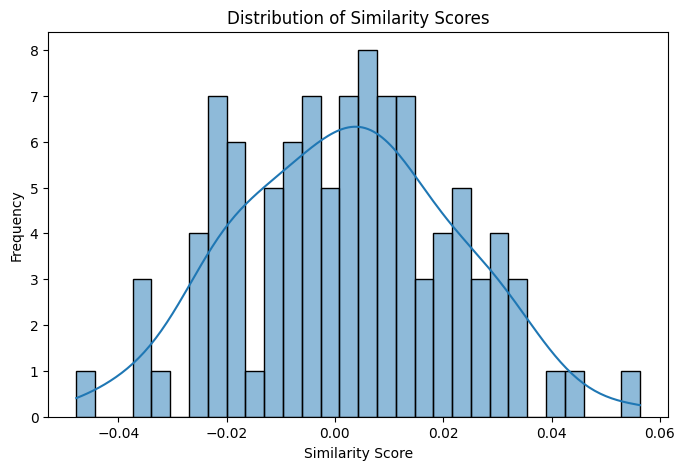

Insufficient samples or features for dimensionality reduction. Skipping PCA, t-SNE, and UMAP.
Error during evaluation: Input vector should be 1-D.
Ensure that y_true and y_pred have the same length.


In [16]:
from crewai import Crew, Agent, Task
import requests
import pandas as pd
from bs4 import BeautifulSoup
import json
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from transformers import AutoTokenizer, AutoModel
from umap.umap_ import UMAP
from scipy.spatial.distance import euclidean
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Load ChemBERTa for zero-shot learning
tokenizer = AutoTokenizer.from_pretrained("seyonec/ChemBERTa-zinc-base-v1")
model = AutoModel.from_pretrained("seyonec/ChemBERTa-zinc-base-v1")

# --- Crew AI Agents ---

class DataExtractionAgent(Agent):
    def __init__(self):
        super().__init__(
            role="Data Extraction Agent",
            goal="Extract chemical compound data from online sources",
            backstory="An expert in web scraping and API data retrieval for drug discovery."
        )

    def run(self):
        zinc_links = self.scrape_zinc()
        pubchem_data = self.get_pubchem_data(2244)  # Example CID
        return zinc_links, pubchem_data
    
    def scrape_zinc(self):
        url = "https://zinc.docking.org/substances/subsets/all-drugs/"
        response = requests.get(url)
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, "html.parser")
            links = [a['href'] for a in soup.find_all('a', href=True) if 'download' in a['href']]
            return links
        return []

    def get_pubchem_data(self, cid):
        url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/{cid}/property/CanonicalSMILES/JSON"
        response = requests.get(url)
        if response.status_code == 200:
            return response.json()
        return None


class FeatureEngineeringAgent(Agent):
    def __init__(self):
        super().__init__(
            role="Feature Engineering Agent",
            goal="Extract molecular embeddings from chemical data",
            backstory="A machine learning specialist focusing on molecular representation learning."
        )

    def run(self, pubchem_data):
        return self.extract_molecular_embeddings(pubchem_data)
    
    def extract_molecular_embeddings(self, data):
        if data and "PropertyTable" in data and "Properties" in data["PropertyTable"]:
            smiles = data["PropertyTable"]["Properties"][0].get("CanonicalSMILES", "")
            inputs = tokenizer(smiles, return_tensors="pt", padding=True, truncation=True)
            with torch.no_grad():
                embeddings = model(**inputs).last_hidden_state.mean(dim=1).numpy()
            return embeddings
        return np.zeros((1, 768))  # Placeholder for unknown molecules


class ZeroShotPredictionAgent(Agent):
    def __init__(self):
        super().__init__(
            role="Zero-Shot Prediction Agent",
            goal="Predict drug similarity using molecular embeddings",
            backstory="A deep learning expert utilizing zero-shot learning techniques for drug discovery."
        )

    def run(self, known_embeddings, new_embeddings):
        return self.zero_shot_predict(known_embeddings, new_embeddings)
    
    def zero_shot_predict(self, known_embeddings, new_embeddings):
        similarity_scores = cosine_similarity(new_embeddings, known_embeddings)
        return similarity_scores.tolist()


# --- Crew AI Workflow ---

data_extraction_agent = DataExtractionAgent()
feature_engineering_agent = FeatureEngineeringAgent()
zero_shot_prediction_agent = ZeroShotPredictionAgent()

def run_pipeline():
    zinc_links, pubchem_data = data_extraction_agent.run()
    new_embeddings = feature_engineering_agent.run(pubchem_data)
    
    # Placeholder for known drug embeddings (should be a dataset of known drugs)
    known_embeddings = np.random.rand(100, 768)  # Simulated known molecules
    
    similarity_scores = zero_shot_prediction_agent.run(known_embeddings, new_embeddings)
    
    return {
        "ZINC Links": zinc_links,
        "Similarity Scores": similarity_scores
    }


# --- Evaluation Metrics ---

def evaluate_model(y_true, y_pred):
    try:
        mae = mean_absolute_error(y_true, y_pred)
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_true, y_pred)
        eucl_dist = np.mean([euclidean(y_true[i], y_pred[i]) for i in range(len(y_true))])
        
        print(f"Evaluation Metrics:\n MAE: {mae}\n MSE: {mse}\n RMSE: {rmse}\n R2 Score: {r2}\n Euclidean Distance: {eucl_dist}")
    except ValueError as e:
        print(f"Error during evaluation: {e}")
        print("Ensure that y_true and y_pred have the same length.")


# --- Exploratory Data Analysis ---

def eda(similarity_scores):
    scores = np.array(similarity_scores).flatten()
    plt.figure(figsize=(8,5))
    sns.histplot(scores, bins=30, kde=True)
    plt.title("Distribution of Similarity Scores")
    plt.xlabel("Similarity Score")
    plt.ylabel("Frequency")
    plt.show()
    
    # Ensure similarity_scores has more than one feature for dimensionality reduction
    embeddings = np.array(similarity_scores)
    
    # Check if dimensionality is sufficient for PCA, t-SNE, and UMAP
    if embeddings.ndim == 1 or embeddings.shape[0] == 1:
        print("Insufficient samples or features for dimensionality reduction. Skipping PCA, t-SNE, and UMAP.")
        return
    
    # Apply PCA
    pca = PCA(n_components=min(2, embeddings.shape[1]))
    reduced_pca = pca.fit_transform(embeddings)
    
    # Apply t-SNE
    tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
    reduced_tsne = tsne.fit_transform(embeddings)
    
    # Apply UMAP
    umap_model = UMAP(n_components=2)
    reduced_umap = umap_model.fit_transform(embeddings)
    
    # Plot the results
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    axs[0].scatter(reduced_pca[:, 0], reduced_pca[:, 1], alpha=0.7)
    axs[0].set_title("PCA Visualization")
    
    axs[1].scatter(reduced_tsne[:, 0], reduced_tsne[:, 1], alpha=0.7)
    axs[1].set_title("t-SNE Visualization")
    
    axs[2].scatter(reduced_umap[:, 0], reduced_umap[:, 1], alpha=0.7)
    axs[2].set_title("UMAP Visualization")
    
    plt.show()


if __name__ == "__main__":
    results = run_pipeline()
    print(json.dumps(results, indent=2))
    
    similarity_scores = results["Similarity Scores"]
    eda(similarity_scores)
    
    # Simulated ground truth and predictions for evaluation
    # Ensure y_true and y_pred have the same length
    y_true = np.random.rand(len(similarity_scores[0])) 
    y_pred = np.array(similarity_scores).flatten()
    evaluate_model(y_true, y_pred)
